In [54]:

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium import IFrame
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from branca.colormap import LinearColormap
from datetime import datetime, timedelta
from scipy.optimize import curve_fit

In [55]:
def slot_to_time(slot):
    days_passed = slot // 36
    slot_in_day = slot % 36
    hour = 6 + slot_in_day // 2
    minute = (slot_in_day % 2) * 30
    date = datetime(2016, 1, 1) + timedelta(days=days_passed)
    date_str = date.strftime('%Y-%m-%d')

    return f"{date_str} {hour:02d}:{minute:02d}"

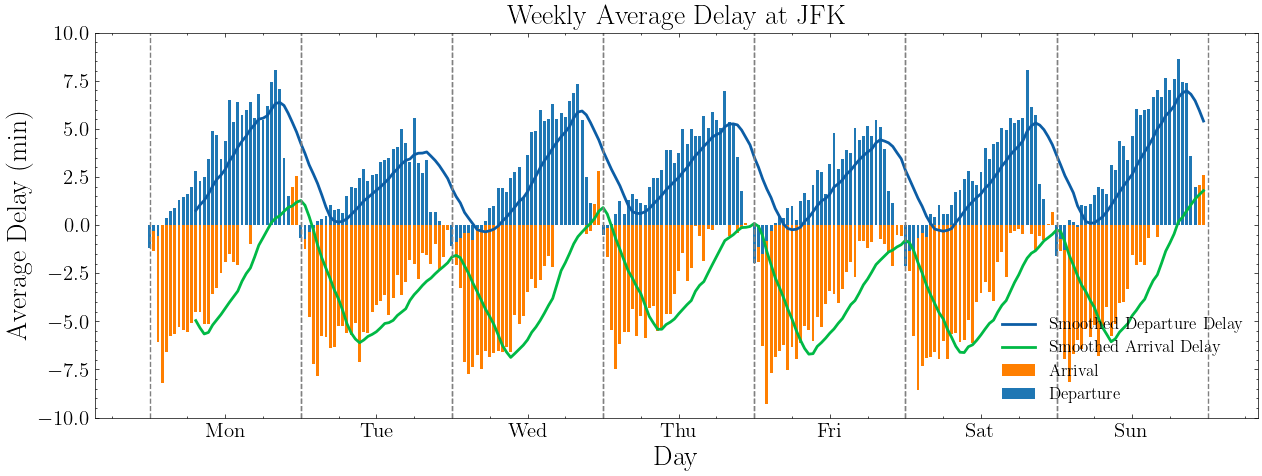

In [56]:
import scienceplots as sp


def slot_to_time(slot):
    days_passed = slot // 36
    slot_in_day = slot % 36
    hour = 6 + slot_in_day // 2
    minute = (slot_in_day % 2) * 30
    date = datetime(2016, 1, 1) + timedelta(days=days_passed)
    date_str = date.strftime('%Y-%m-%d')

    return f"{date_str} {hour:02d}:{minute:02d}"

delay_data = pd.read_csv('JFK_delay_data.csv')
arr = delay_data['arr_delay'].values
dep = delay_data['dep_delay'].values

delay_data['JFK_dep_delay_rolling_mean'] = delay_data['dep_delay'].rolling(
    window=12).mean()
delay_data['JFK_arr_delay_rolling_mean'] = delay_data['arr_delay'].rolling(
    window=12).mean()


plt.style.use('science')

fig, ax = plt.subplots(figsize=(15, 5))
airport = 'JFK'
time_points = [slot_to_time(i) for i in range(0, 36*7)]

plt.bar(time_points, arr, label='Arrival', color='#FF7F00', width=0.7)
plt.bar(time_points, dep, label='Departure', color='#1F77B4', width=0.7)

plt.plot(delay_data.index, delay_data['JFK_dep_delay_rolling_mean'],
         linewidth=2, label='Smoothed Departure Delay')
plt.plot(delay_data.index, delay_data['JFK_arr_delay_rolling_mean'],
         linewidth=2, label='Smoothed Arrival Delay')

plt.xlabel('Day', fontsize=20)

# Setting the x-axis ticks and labels to represent days of the week
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# Assuming every day has 36 time points,
# so every 36th point should be labeled with the corresponding day of the week
plt.xticks([i*36 + 18 for i in range(7)], days)

plt.ylim(-10, 10)
plt.ylabel('Average Delay (min)', fontsize=20)
plt.title(f'Weekly Average Delay at {airport}', fontsize=20)
plt.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=15)

# Add vertical lines at 6:00 AM and 6:00 PM for each day
for i in range(7):
    plt.axvline(x=i*36, color='gray', linestyle='--', linewidth=1)  # 6:00 AM
    plt.axvline(x=i*36 + 36, color='gray',
                linestyle='--', linewidth=1)  # 24:00 PM

plt.show()

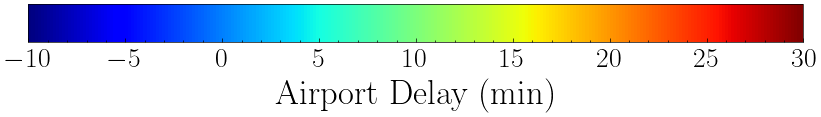

In [57]:
norm = plt.Normalize(-10, 30)
cmap = plt.get_cmap('jet')

# create a ScalarMappable object
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# create a colorbar
fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)

# plot the colorbar
cb = plt.colorbar(sm, cax=ax, fraction=0.1, pad=0.05, orientation='horizontal')
cb.set_label('Airport Delay (min)', fontsize=25)
cb.ax.tick_params(labelsize=20)
plt.show()


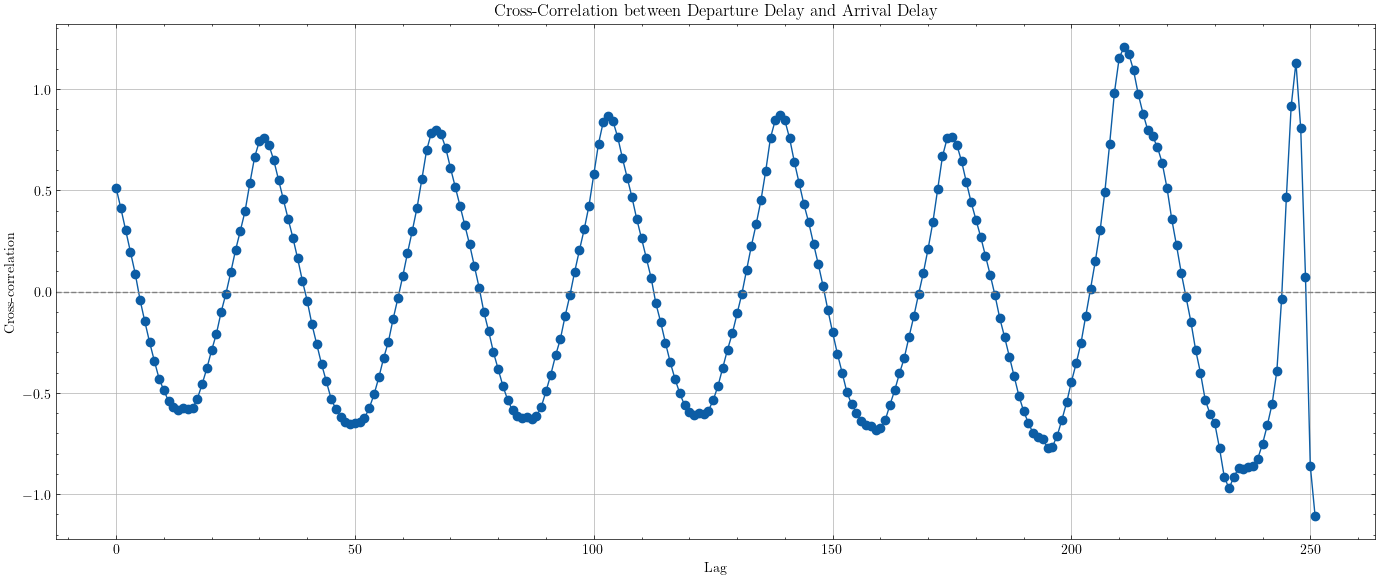

(1.206368675762632, -1.1064732228445668, 211, 251)

In [58]:
from statsmodels.tsa.stattools import ccf

# Calculate the cross-correlation between the two time series
cross_corr = ccf(delay_data['dep_delay'], delay_data['arr_delay'])

# Plotting the cross-correlation
plt.figure(figsize=(14, 6))
plt.plot(cross_corr, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Cross-Correlation between Departure Delay and Arrival Delay')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying lags with the highest positive and negative correlations
positive_max_lag = np.argmax(cross_corr)
negative_max_lag = np.argmin(cross_corr)
cross_corr[positive_max_lag], cross_corr[negative_max_lag], positive_max_lag, negative_max_lag

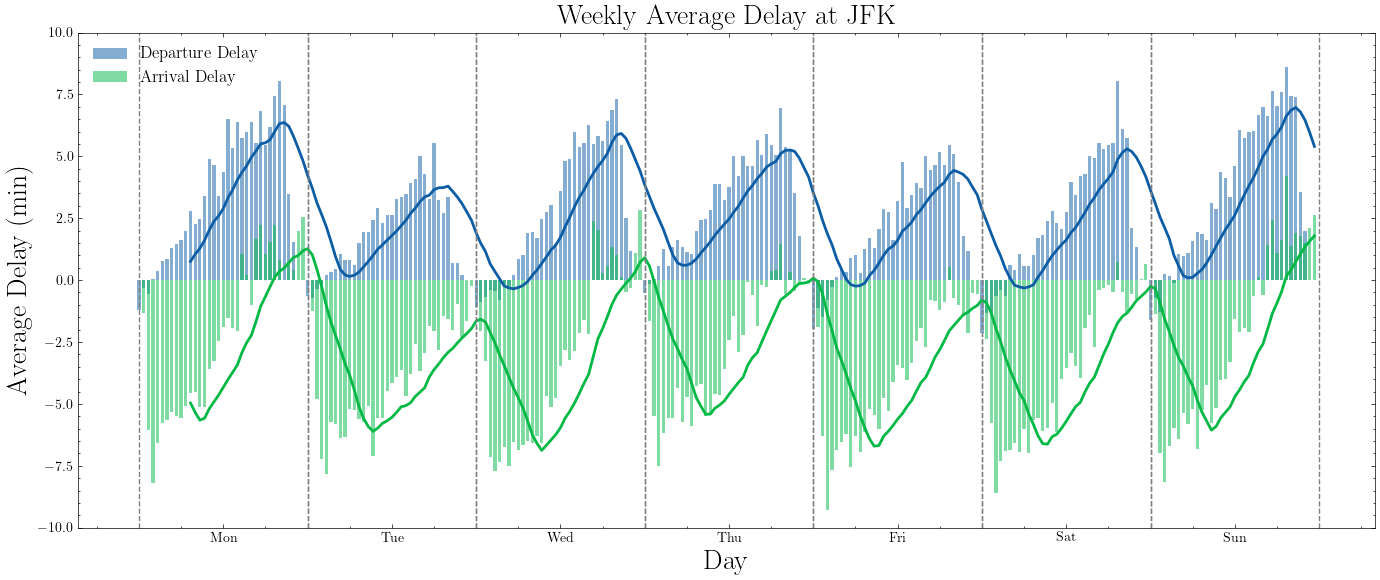

(None, 0.5117362555403896)

In [59]:
def slot_to_time(slot):
    days_passed = slot // 36
    slot_in_day = slot % 36
    hour = 6 + slot_in_day // 2
    minute = (slot_in_day % 2) * 30
    date = datetime(2016, 1, 1) + timedelta(days=days_passed)
    date_str = date.strftime('%Y-%m-%d')

    return f"{date_str} {hour:02d}:{minute:02d}"


data = pd.read_csv('JFK_delay_data.csv')

# Compute the rolling average of delays with a window of 12 (approx. 6 hours)
data['JFK_dep_delay_rolling_mean'] = data['dep_delay'].rolling(
    window=12).mean()
data['JFK_arr_delay_rolling_mean'] = data['arr_delay'].rolling(
    window=12).mean()

# Compute the Pearson correlation coefficient between departure and arrival delays
correlation = data['dep_delay'].corr(data['arr_delay'])

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot the original and smoothed time series of departure and arrival delays
plt.bar(data.index, data['dep_delay'],
         alpha=0.5, label='Departure Delay', width=0.7)
plt.bar(data.index, data['arr_delay'],
         alpha=0.5, label='Arrival Delay', width=0.7)
plt.plot(data.index, data['JFK_dep_delay_rolling_mean'],
         linewidth=2)
plt.plot(data.index, data['JFK_arr_delay_rolling_mean'],
         linewidth=2)

# Titles and labels
# plt.title('Time Series of JFK Delays with Rolling Mean')
# plt.xlabel('Time')
# plt.ylabel('Delay (minutes)')
# plt.legend()

plt.xlabel('Day', fontsize=20)

# Setting the x-axis ticks and labels to represent days of the week
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# Assuming every day has 36 time points,
# so every 36th point should be labeled with the corresponding day of the week
plt.xticks([i*36 + 18 for i in range(7)], days)

plt.ylim(-10, 10)
plt.ylabel('Average Delay (min)', fontsize=20)
plt.title(f'Weekly Average Delay at {airport}', fontsize=20)
plt.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=15)

# Add vertical lines at 6:00 AM and 6:00 PM for each day
for i in range(7):
    plt.axvline(x=i*36, color='gray', linestyle='--', linewidth=1)  # 6:00 AM
    plt.axvline(x=i*36 + 36, color='gray',
                linestyle='--', linewidth=1)  # 24:00 PM


# Display the plots
plt.tight_layout()
plt.show(), correlation

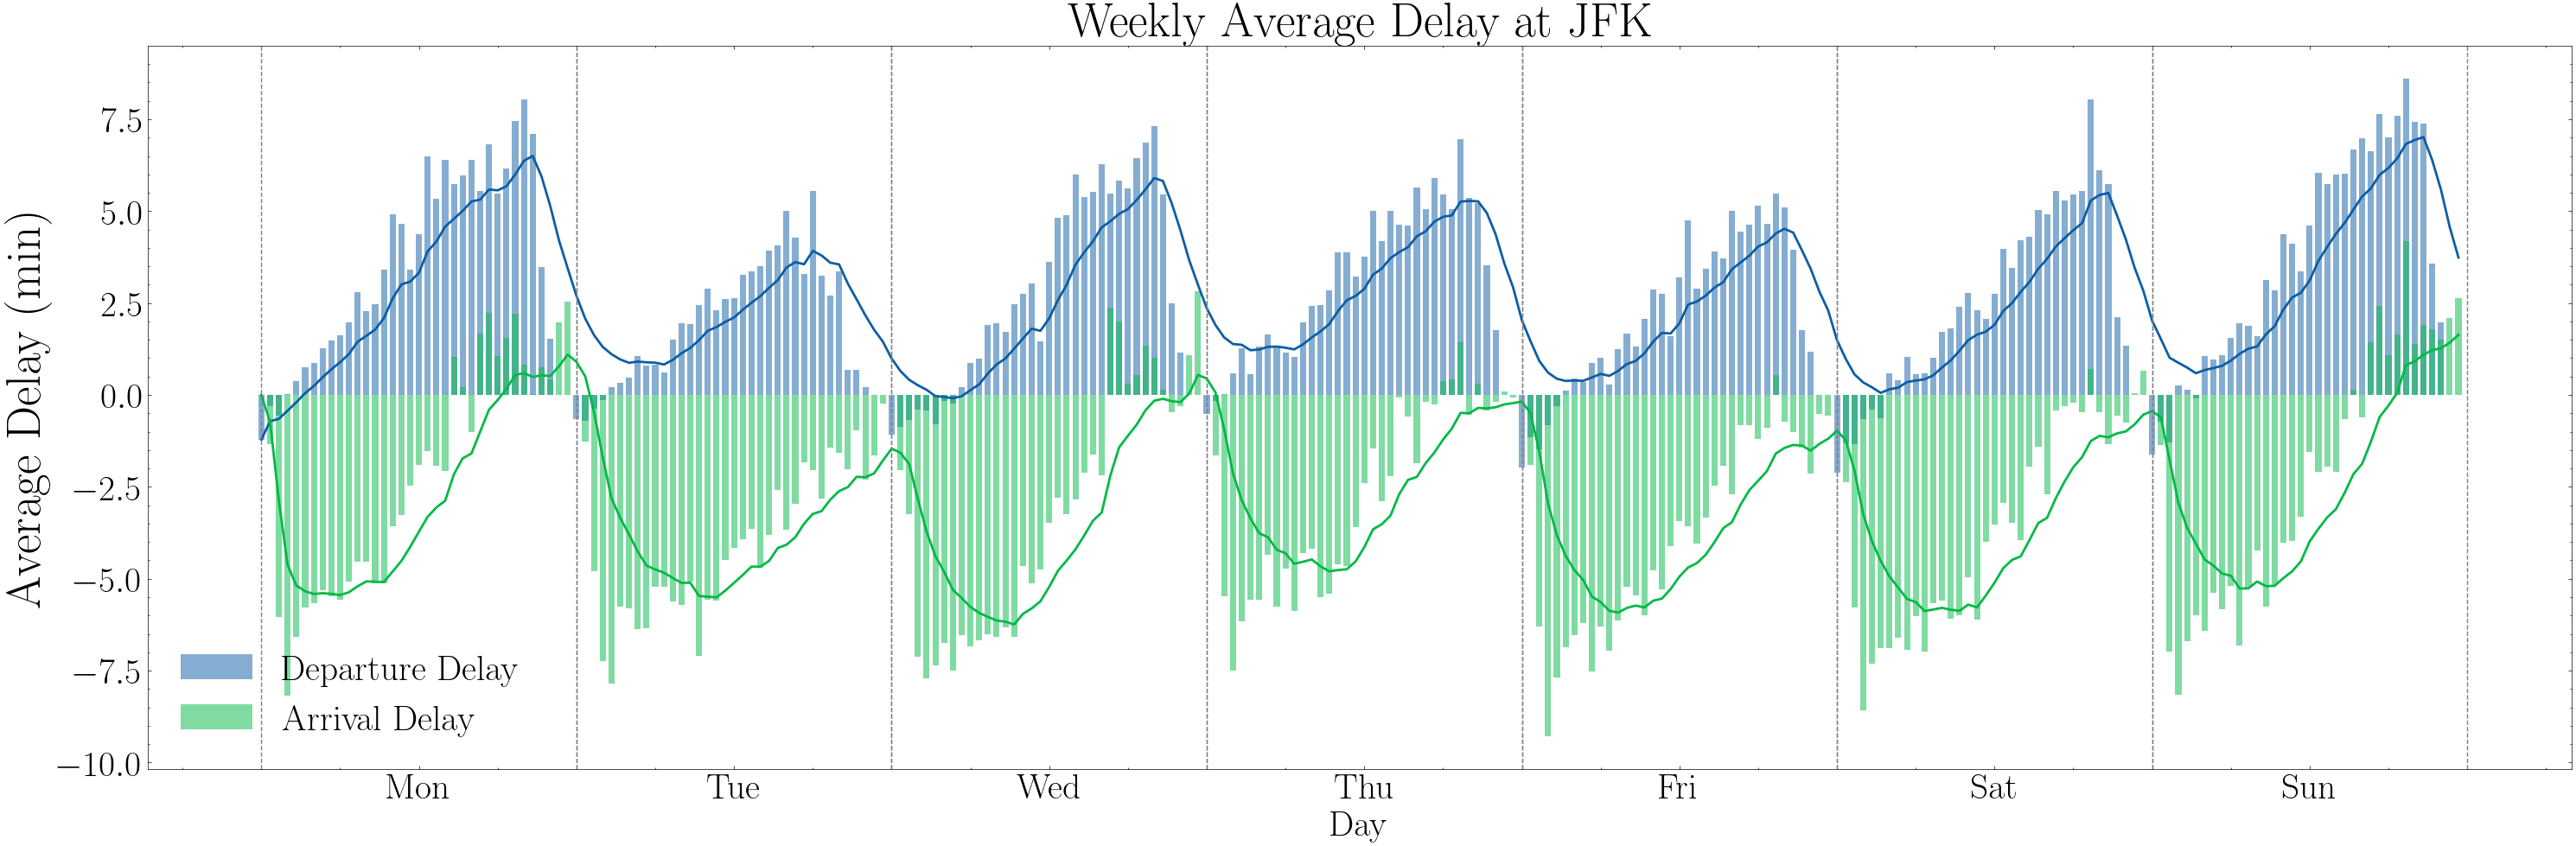

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to convert slot to time


def slot_to_time(slot):
    days_passed = slot // 36
    slot_in_day = slot % 36
    hour = 6 + slot_in_day // 2
    minute = (slot_in_day % 2) * 30
    date = datetime(2016, 1, 1) + timedelta(days=days_passed)
    date_str = date.strftime('%Y-%m-%d')
    return f"{date_str} {hour:02d}:{minute:02d}"


# Load the data
data = pd.read_csv('JFK_delay_data.csv')

# Compute Exponential Moving Averages with a span of 12
data['JFK_dep_delay_EMA'] = data['dep_delay'].ewm(span=10).mean()
data['JFK_arr_delay_EMA'] = data['arr_delay'].ewm(span=10).mean()

# Set up the figure
fig, ax = plt.subplots(figsize=(30,10))

# Plot the original time series of departure and arrival delays
ax.bar(data.index, data['dep_delay'],
       alpha=0.5, label='Departure Delay', width=0.7)
ax.bar(data.index, data['arr_delay'],
       alpha=0.5, label='Arrival Delay', width=0.7)

# Plot the EMA of departure and arrival delays
ax.plot(data.index, data['JFK_dep_delay_EMA'],
        linewidth=2)
ax.plot(data.index, data['JFK_arr_delay_EMA'],
        linewidth=2)

# Titles and labels
ax.set_xlabel('Time Slot', fontsize=20)
ax.set_ylabel('Delay (minutes)', fontsize=20)
ax.set_title(
    'Time Series of JFK Delays with Exponential Moving Average', fontsize=20)
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=24)

plt.xlabel('Day', fontsize=30)

# Setting the x-axis ticks and labels to represent days of the week
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# Assuming every day has 36 time points,
# so every 36th point should be labeled with the corresponding day of the week
plt.xticks([i*36 + 18 for i in range(7)], days)

# plt.ylim(-10, 10)
plt.ylabel('Average Delay (min)', fontsize=40)
plt.title(f'Weekly Average Delay at {airport}', fontsize=40)
plt.legend(fontsize=30)
ax.tick_params(axis='both', labelsize=30)

# Add vertical lines at 6:00 AM and 6:00 PM for each day
for i in range(7):
    plt.axvline(x=i*36, color='gray', linestyle='--', linewidth=1)  # 6:00 AM
    plt.axvline(x=i*36 + 36, color='gray',
                linestyle='--', linewidth=1)  # 24:00 PM


# Display the plots
plt.tight_layout()
plt.show()

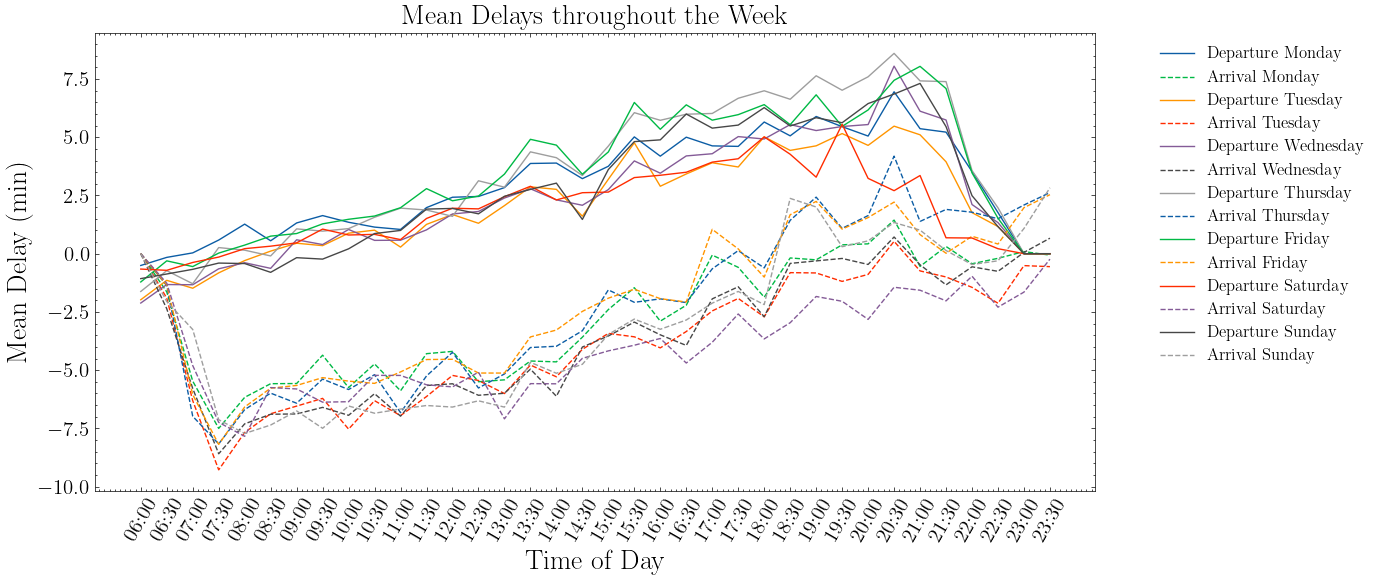

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to convert slot to time


def slot_to_time(slot):
    days_passed = slot // 36
    slot_in_day = slot % 36
    hour = 6 + slot_in_day // 2
    minute = (slot_in_day % 2) * 30
    date = datetime(2016, 1, 1) + timedelta(days=days_passed)
    date_str = date.strftime('%Y-%m-%d')
    return f"{date_str} {hour:02d}:{minute:02d}"


# Load the data
data = pd.read_csv('JFK_delay_data.csv')

# Add a new column to the dataframe with the actual time
data['Time'] = [slot_to_time(slot) for slot in data.index]

# Convert the 'Time' column to datetime type for better handling and set it as index
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Extract day of week and time from the index
data['DayOfWeek'] = data.index.day_name()
data['TimeOfDay'] = data.index.time

# Compute the mean delay for each day of the week and time of day
grouped_data = data.groupby(['DayOfWeek', 'TimeOfDay']).mean()

# Reorder the days of week
ordered_days_of_week = ['Monday', 'Tuesday', 'Wednesday',
                        'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data = grouped_data.reindex(ordered_days_of_week, level='DayOfWeek')

# Reset index for better visualization
grouped_data_reset = grouped_data.reset_index()

# Convert 'TimeOfDay' to string for better visualization
grouped_data_reset['TimeOfDayStr'] = grouped_data_reset['TimeOfDay'].apply(
    lambda x: x.strftime('%H:%M'))

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the mean delay for each day of the week and time of day
for day in ordered_days_of_week:
    subset_data = grouped_data_reset[grouped_data_reset['DayOfWeek'] == day]
    ax.plot(subset_data['TimeOfDayStr'],
            subset_data['dep_delay'], label=f'Departure {day}')
    ax.plot(subset_data['TimeOfDayStr'], subset_data['arr_delay'],
            linestyle='--', label=f'Arrival {day}')

# Titles and labels
ax.set_xlabel('Time of Day', fontsize=20)
ax.set_ylabel('Mean Delay (min)', fontsize=20)
ax.set_title('Mean Delays throughout the Week', fontsize=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax.tick_params(axis='both', labelsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plots
plt.tight_layout()
plt.show()

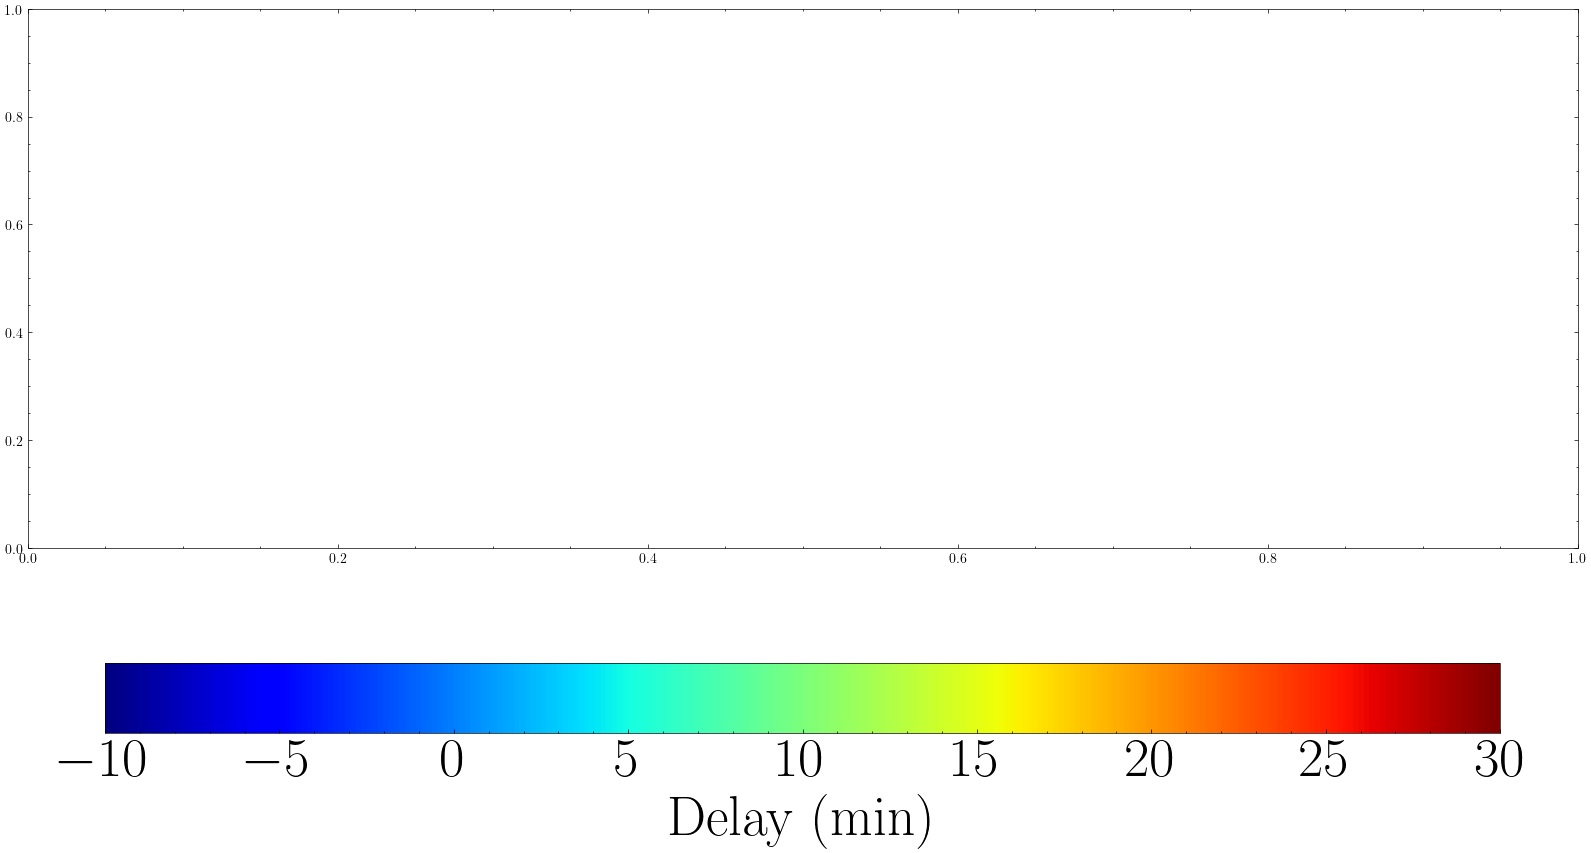

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))  # 调整colorbar 的大小

norm = plt.Normalize(-10, 30)
cmap = plt.get_cmap('jet')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, label='Delay (min)',
                    orientation='horizontal', shrink=0.9, ax=ax)

# 获取colorbar标签
label = cbar.ax.xaxis.get_label()

# 调整字体大小
label.set_fontsize(40)

# 获取colorbar x轴刻度标签
xticks = cbar.ax.get_xticklabels()

# 调整字体大小
for tick in xticks:
    tick.set_fontsize(40)


plt.show()